In [1]:
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt



#Downloading S&P 500 Data



In [2]:
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 1, 1)
data = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = data.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [4]:
sc = StandardScaler()
data = sc.fit_transform(data)

In [35]:
data

array([[-1.14571298],
       [-1.12459184],
       [-1.09249161],
       ...,
       [ 0.56824178],
       [ 0.53217742],
       [ 0.56749387]])

# Format the data

In [5]:
x_train = []
y_train = []
data.reshape((1259,))

array([-1.14571298, -1.12459184, -1.09249161, ...,  0.56824178,
        0.53217742,  0.56749387])

2697.85009765625

In [6]:
for i in range(30, 1259):
  x_vals = []
  for j in range(i-30, i):
    x_vals += [data[j]]
  x_train.append(x_vals)
  y_train.append(data[i])

In [9]:
len(x_train)

1229

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train[1]

array([[-1.12459184],
       [-1.09249161],
       [-1.07451183],
       [-1.05754948],
       [-1.04486496],
       [-1.05324133],
       [-1.04214247],
       [-1.01639947],
       [-0.97334975],
       [-0.9942463 ],
       [-0.96820422],
       [-0.96790476],
       [-0.95809247],
       [-0.9193655 ],
       [-0.90385404],
       [-0.90262737],
       [-0.90077257],
       [-0.87123014],
       [-0.92282093],
       [-0.92331467],
       [-0.94718788],
       [-0.95845145],
       [-1.05995754],
       [-1.24884965],
       [-1.13491321],
       [-1.14379829],
       [-1.2682953 ],
       [-1.21598654],
       [-1.20174631],
       [-1.19435705]])

#Creating the model

In [8]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(30, 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 13s 11ms/step - loss: 0.1813 - accuracy: 0.0000e+00
Epoch 2/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0554 - accuracy: 0.0000e+00
Epoch 3/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0488 - accuracy: 0.0000e+00
Epoch 4/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0426 - accuracy: 0.0000e+00
Epoch 5/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.0000e+00
Epoch 6/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.0000e+00
Epoch 7/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 8/100
39/39 [==============================] - 1s 14ms/step - loss: 0.0346 - accuracy: 0.0000e+00
Epoch 9/100
39/39 [==============================] - 1s 16ms/step - loss: 0.0295 - accuracy: 0.0000e+00
Epoch 10/100
39/39 [==============================] - 1s 16ms/s

#Testing the data


In [10]:
test_start = datetime(2023, 1, 1)
test_end = datetime(2023, 8, 27)
test_data =  yf.download('^GSPC', start=test_start, end=test_end)

[*********************100%%**********************]  1 of 1 completed


In [11]:
test_data = test_data.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [12]:
sc = StandardScaler()
test_data = sc.fit_transform(test_data)

In [13]:
len(test_data)

163

In [14]:
x_test = []
y_test = []
test_data.reshape((163,))

array([-1.6244159 , -1.68674997, -1.68973951, -1.76865724, -1.34706863,
       -1.45433395, -1.24327423, -1.02527269, -1.10708344, -0.92061085,
       -0.90629288, -1.3421512 , -1.35565   , -1.02252561, -0.90875159,
       -1.00049371, -0.74320102, -0.65816063, -0.67961346, -0.81662343,
       -0.57933823, -0.15215661, -0.25816962, -0.34070421, -0.40925628,
       -0.17727338, -0.22172323, -0.58488299, -0.45134275, -0.30632931,
       -0.34104083, -0.36394017, -0.54404999, -0.66476467, -0.90831729,
       -0.82747048, -1.04614762, -0.95397119, -1.02710524, -1.09387418,
       -1.21275865, -0.92668525, -0.65126705, -0.68448263, -0.97716007,
       -0.92360038, -1.33766809, -1.71201151, -1.42810846, -1.51136572,
       -1.50080821, -1.11629214, -1.31501003, -1.03337267, -0.90730508,
       -1.11378517, -1.21020343, -0.99943325, -1.04185752, -0.91940562,
       -0.69181051, -0.64630137, -0.42444168, -0.29991948, -0.46156365,
       -0.52592331, -0.50639838, -0.38544125, -0.33033737, -0.43

In [16]:
for i in range(30, 163):
  x_vals = []
  for j in range(i-30, i):
    x_vals += [test_data[j]]
  x_test.append(x_vals)
  y_test.append(test_data[i])

In [17]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [18]:
predicted = model.predict(x_test)
predicted = sc.inverse_transform(predicted)

y_test = sc.inverse_transform(y_test)

5/5 [==============================] - 1s 6ms/step


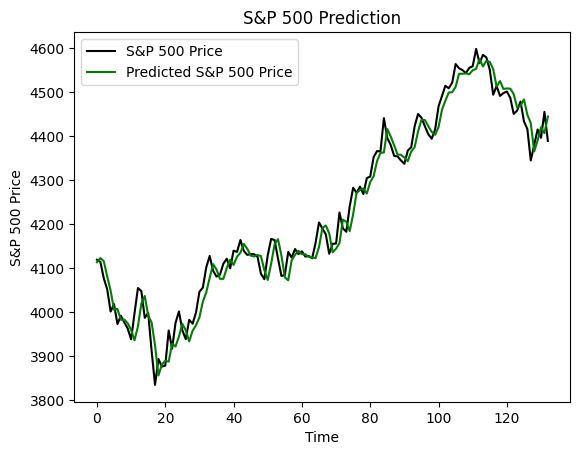

In [19]:
plt.plot(y_test, color = 'black', label = 'S&P 500 Price')
plt.plot(predicted, color = 'green', label = 'Predicted S&P 500 Price')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()
